In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('DS3_C1_S2_Store_Item_Sales_Data_Challenge.csv')

In [12]:
df['date']=df['date'].astype('datetime64[ns]')
df=df.set_index('date')

In [6]:
sales=df['sales']

<AxesSubplot:>

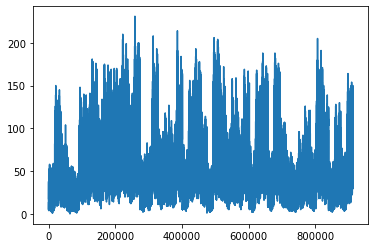

In [10]:
df['sales'].plot()

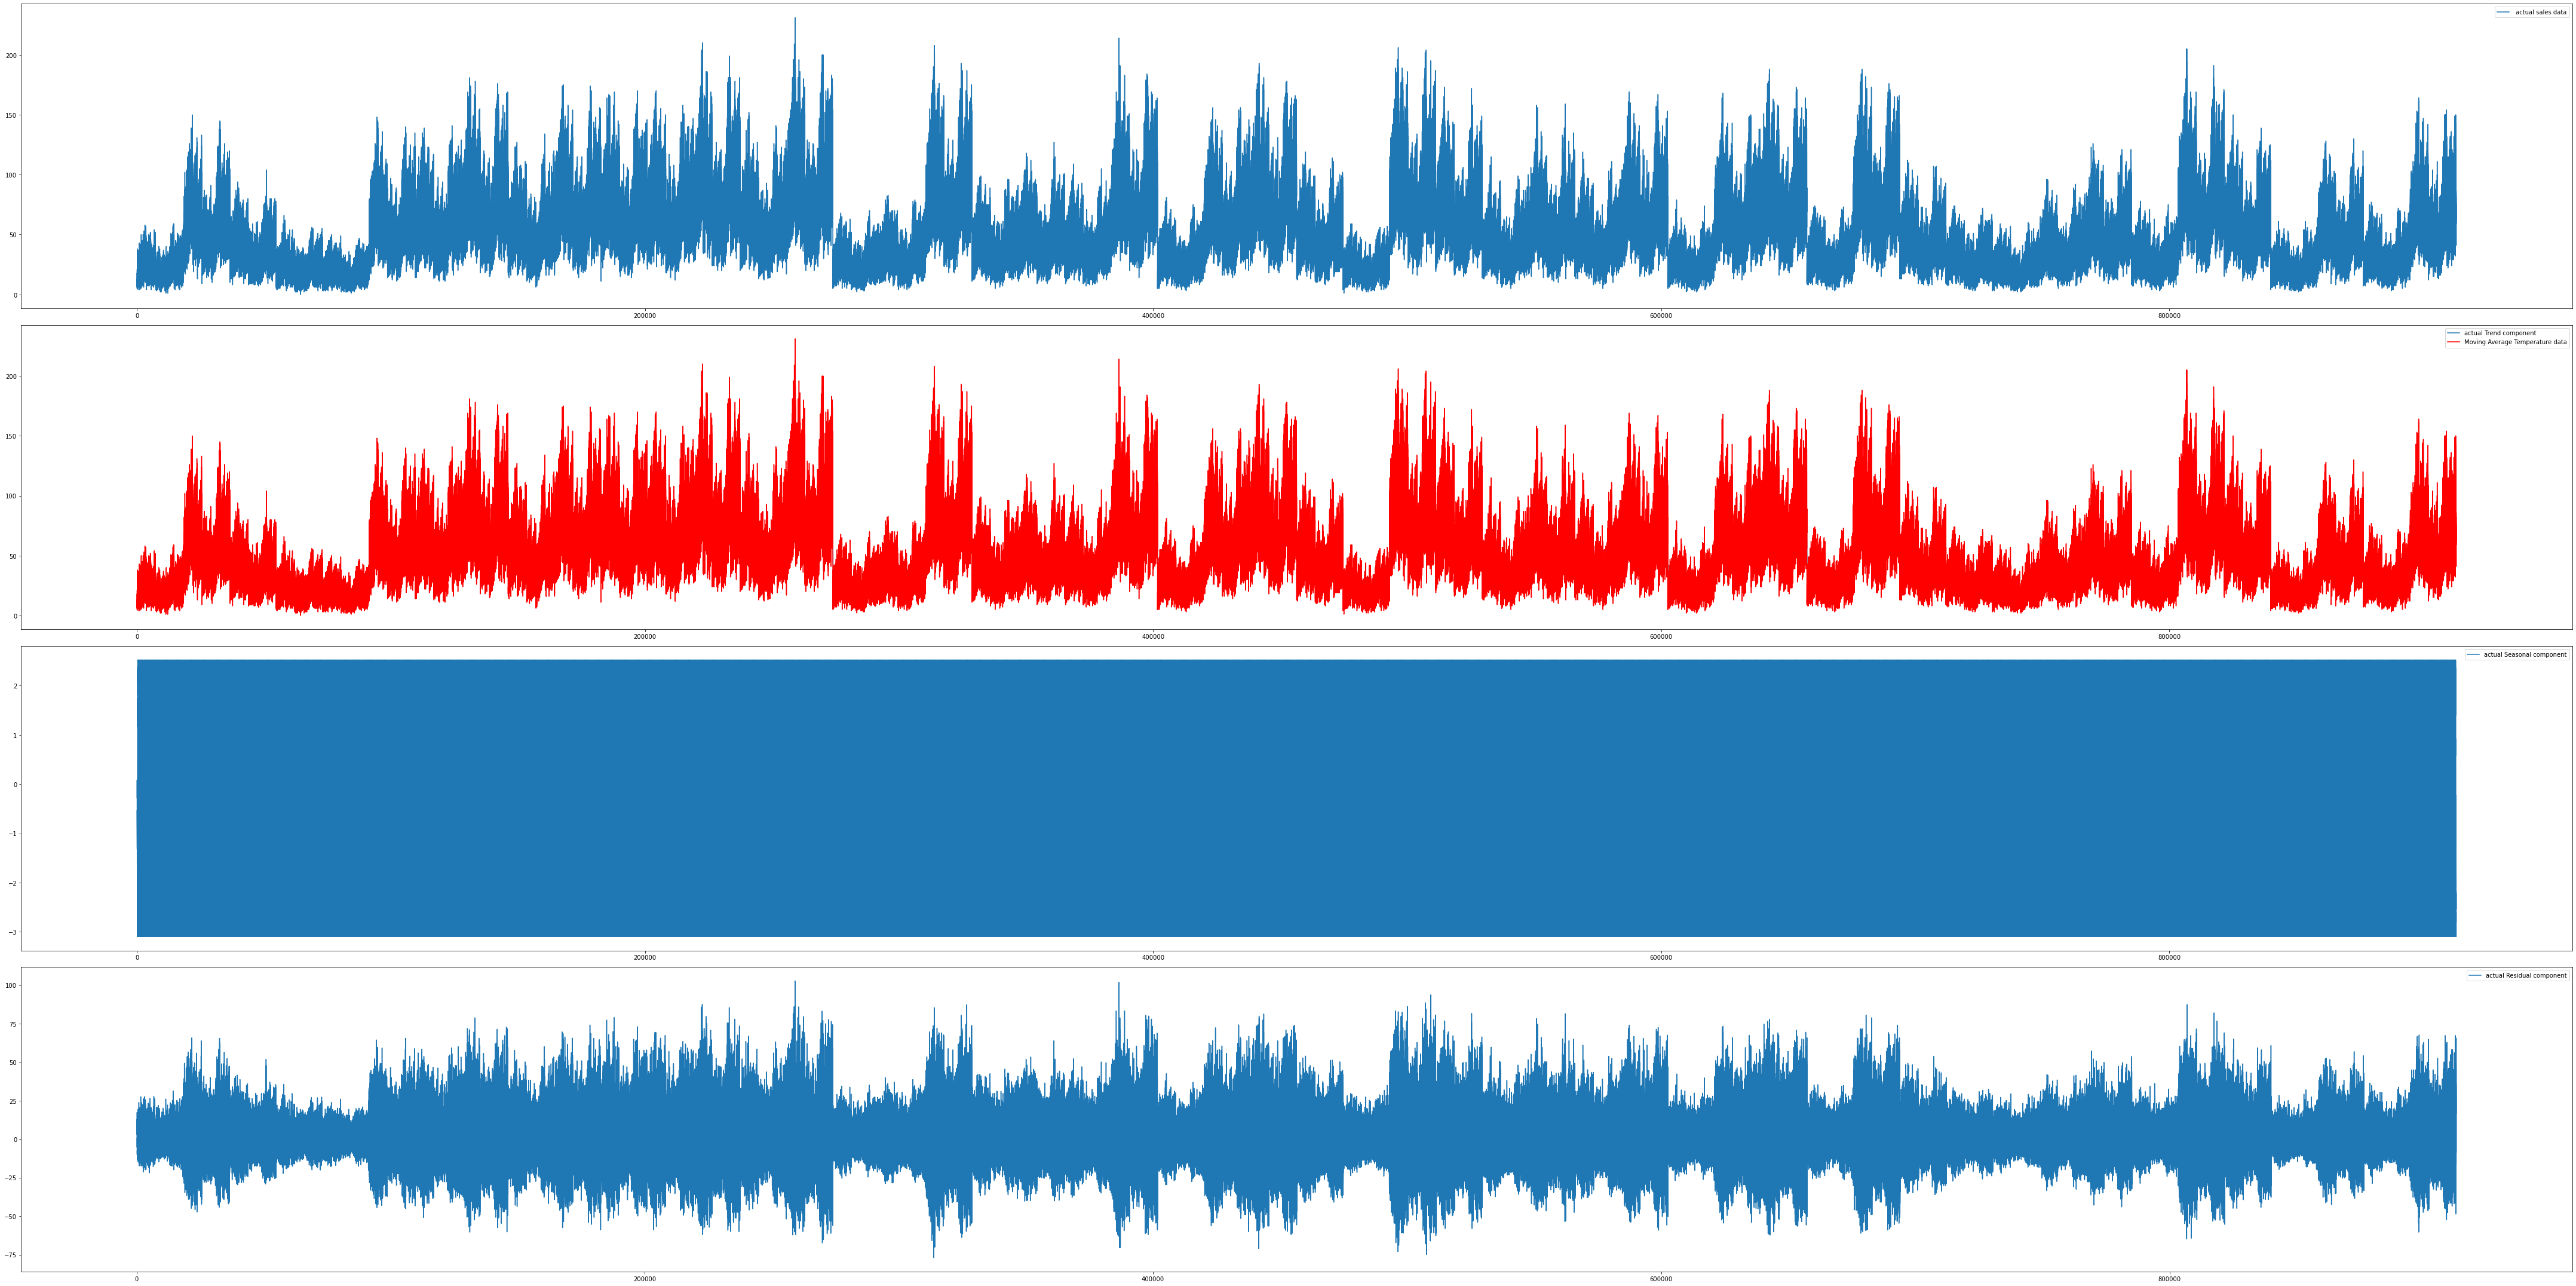

In [15]:
decomposition=seasonal_decompose(np.asarray(sales), period=365)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid
plt.figure(figsize=(60,30))

plt.subplot(411)
plt.plot(sales,label=' actual sales data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='actual Trend component')
plt.plot(sales, color='red', label = 'Moving Average monthly_saleserature data')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='actual Seasonal component')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='actual Residual component')
plt.legend(loc='best')

plt.tight_layout()

In [16]:
df_monthly = df.resample('M').mean()
monthly_sales=df_monthly['sales']

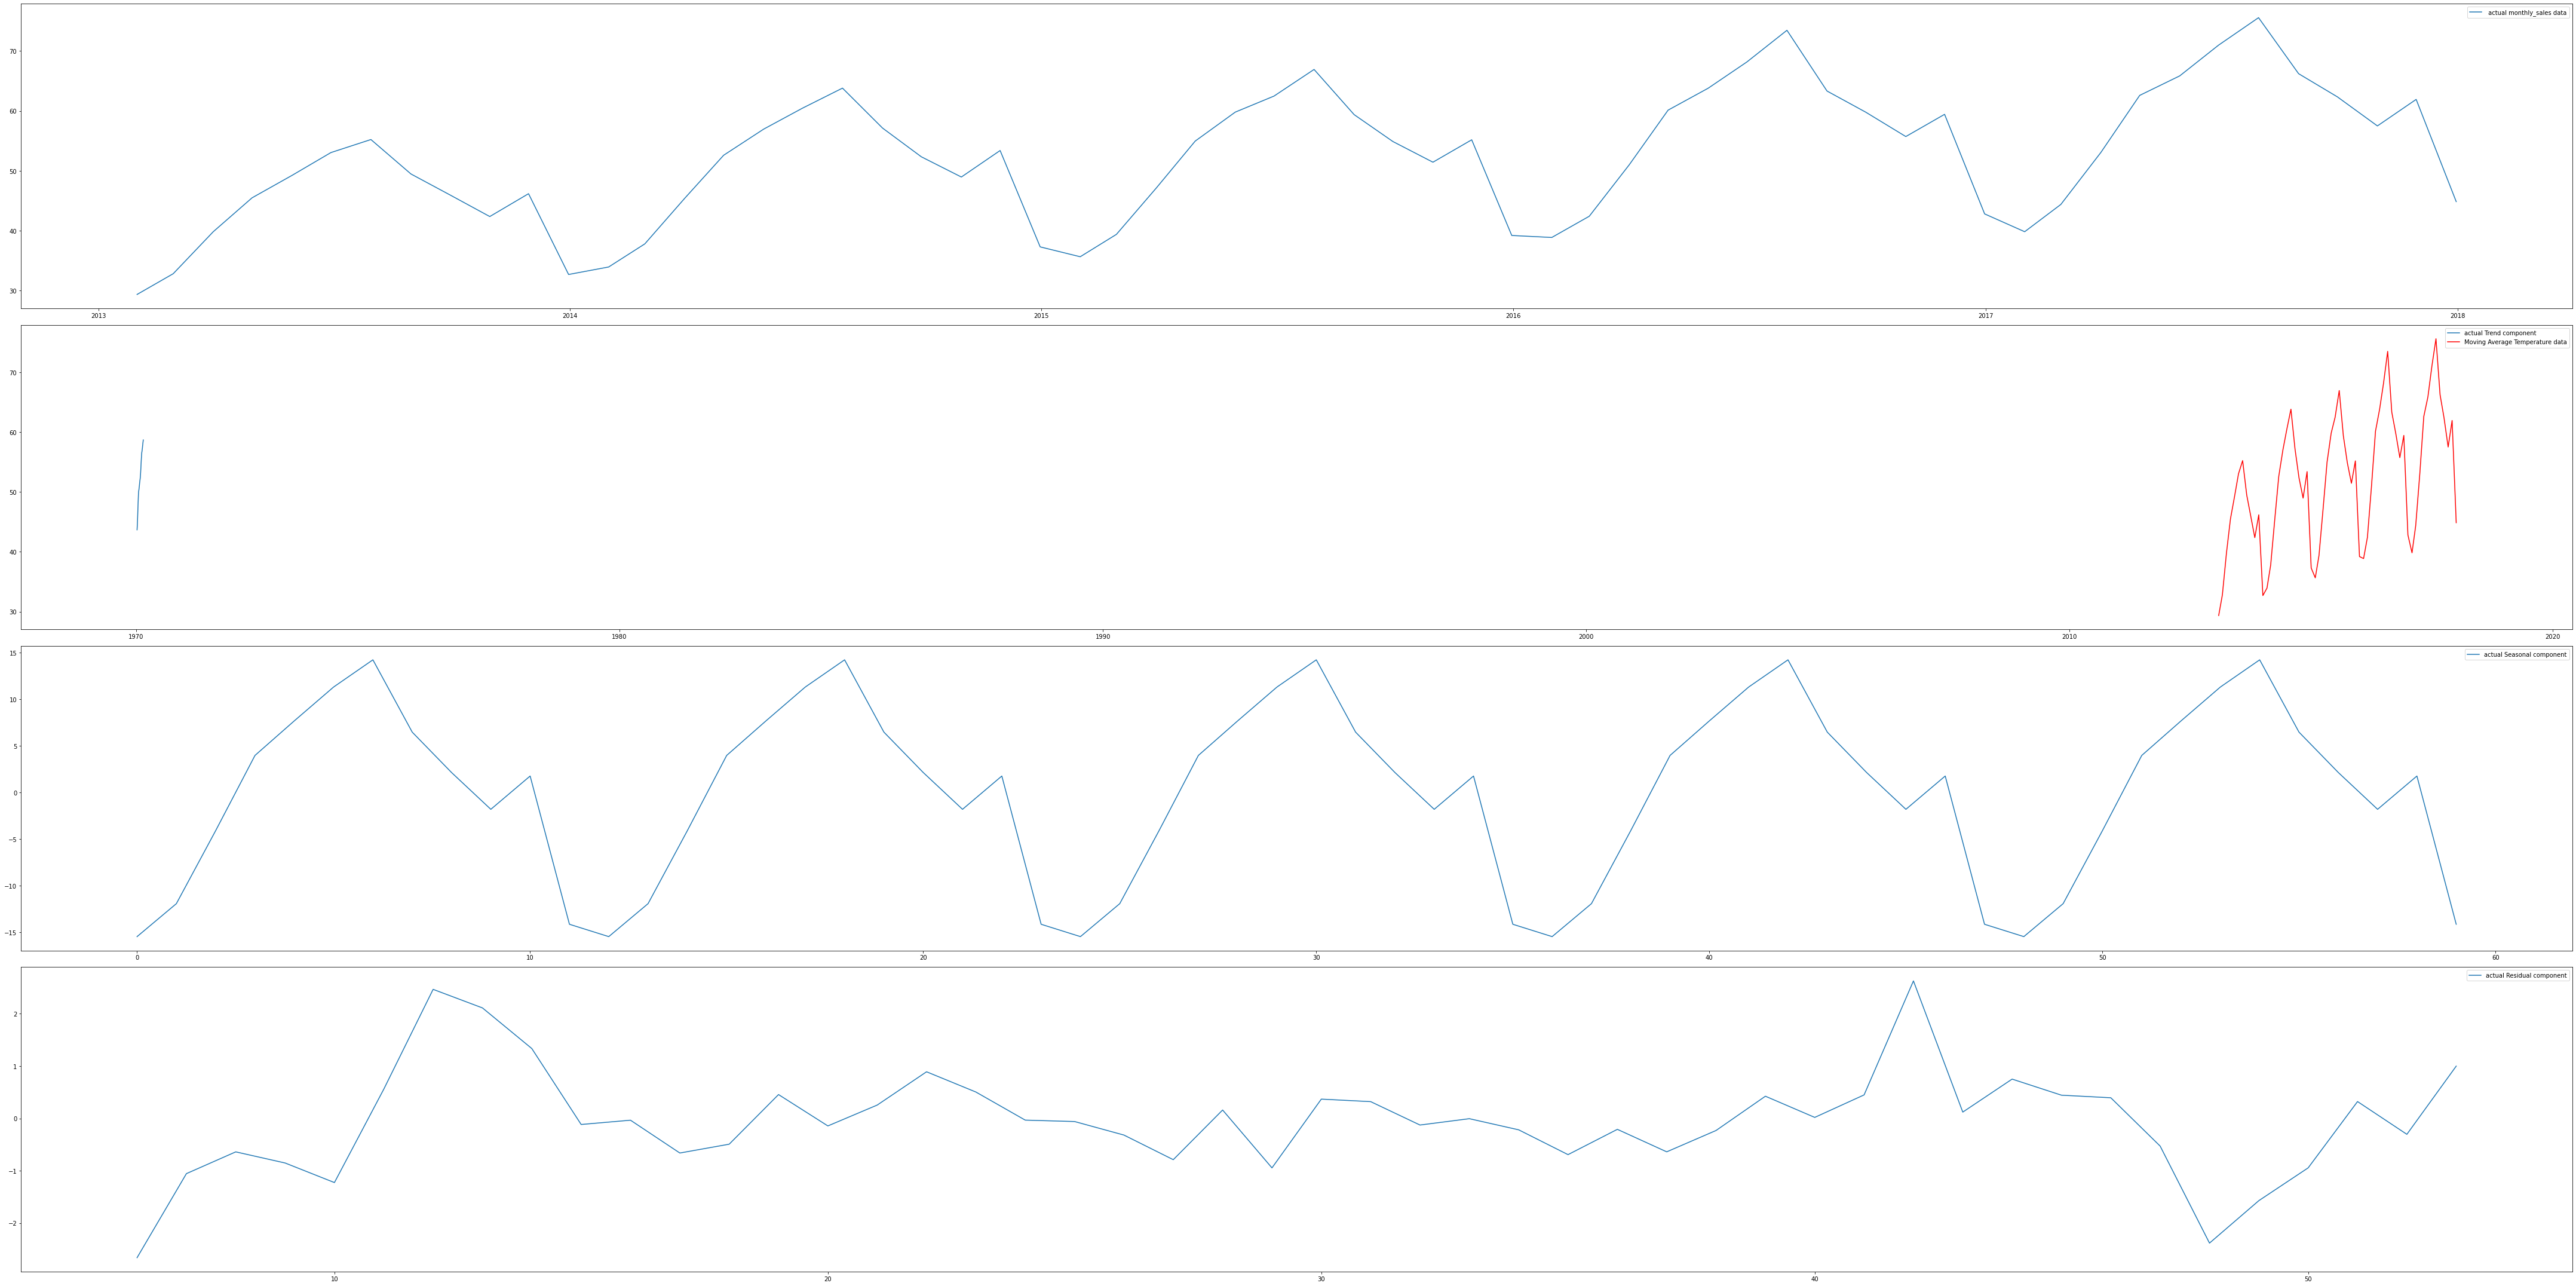

In [18]:
decomposition=seasonal_decompose(np.asarray(monthly_sales), period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid
plt.figure(figsize=(60,30))

plt.subplot(411)
plt.plot(monthly_sales,label=' actual monthly_sales data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='actual Trend component')
plt.plot(monthly_sales, color='red', label = 'Moving Average monthly_saleserature data')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='actual Seasonal component')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='actual Residual component')
plt.legend(loc='best')

plt.tight_layout()

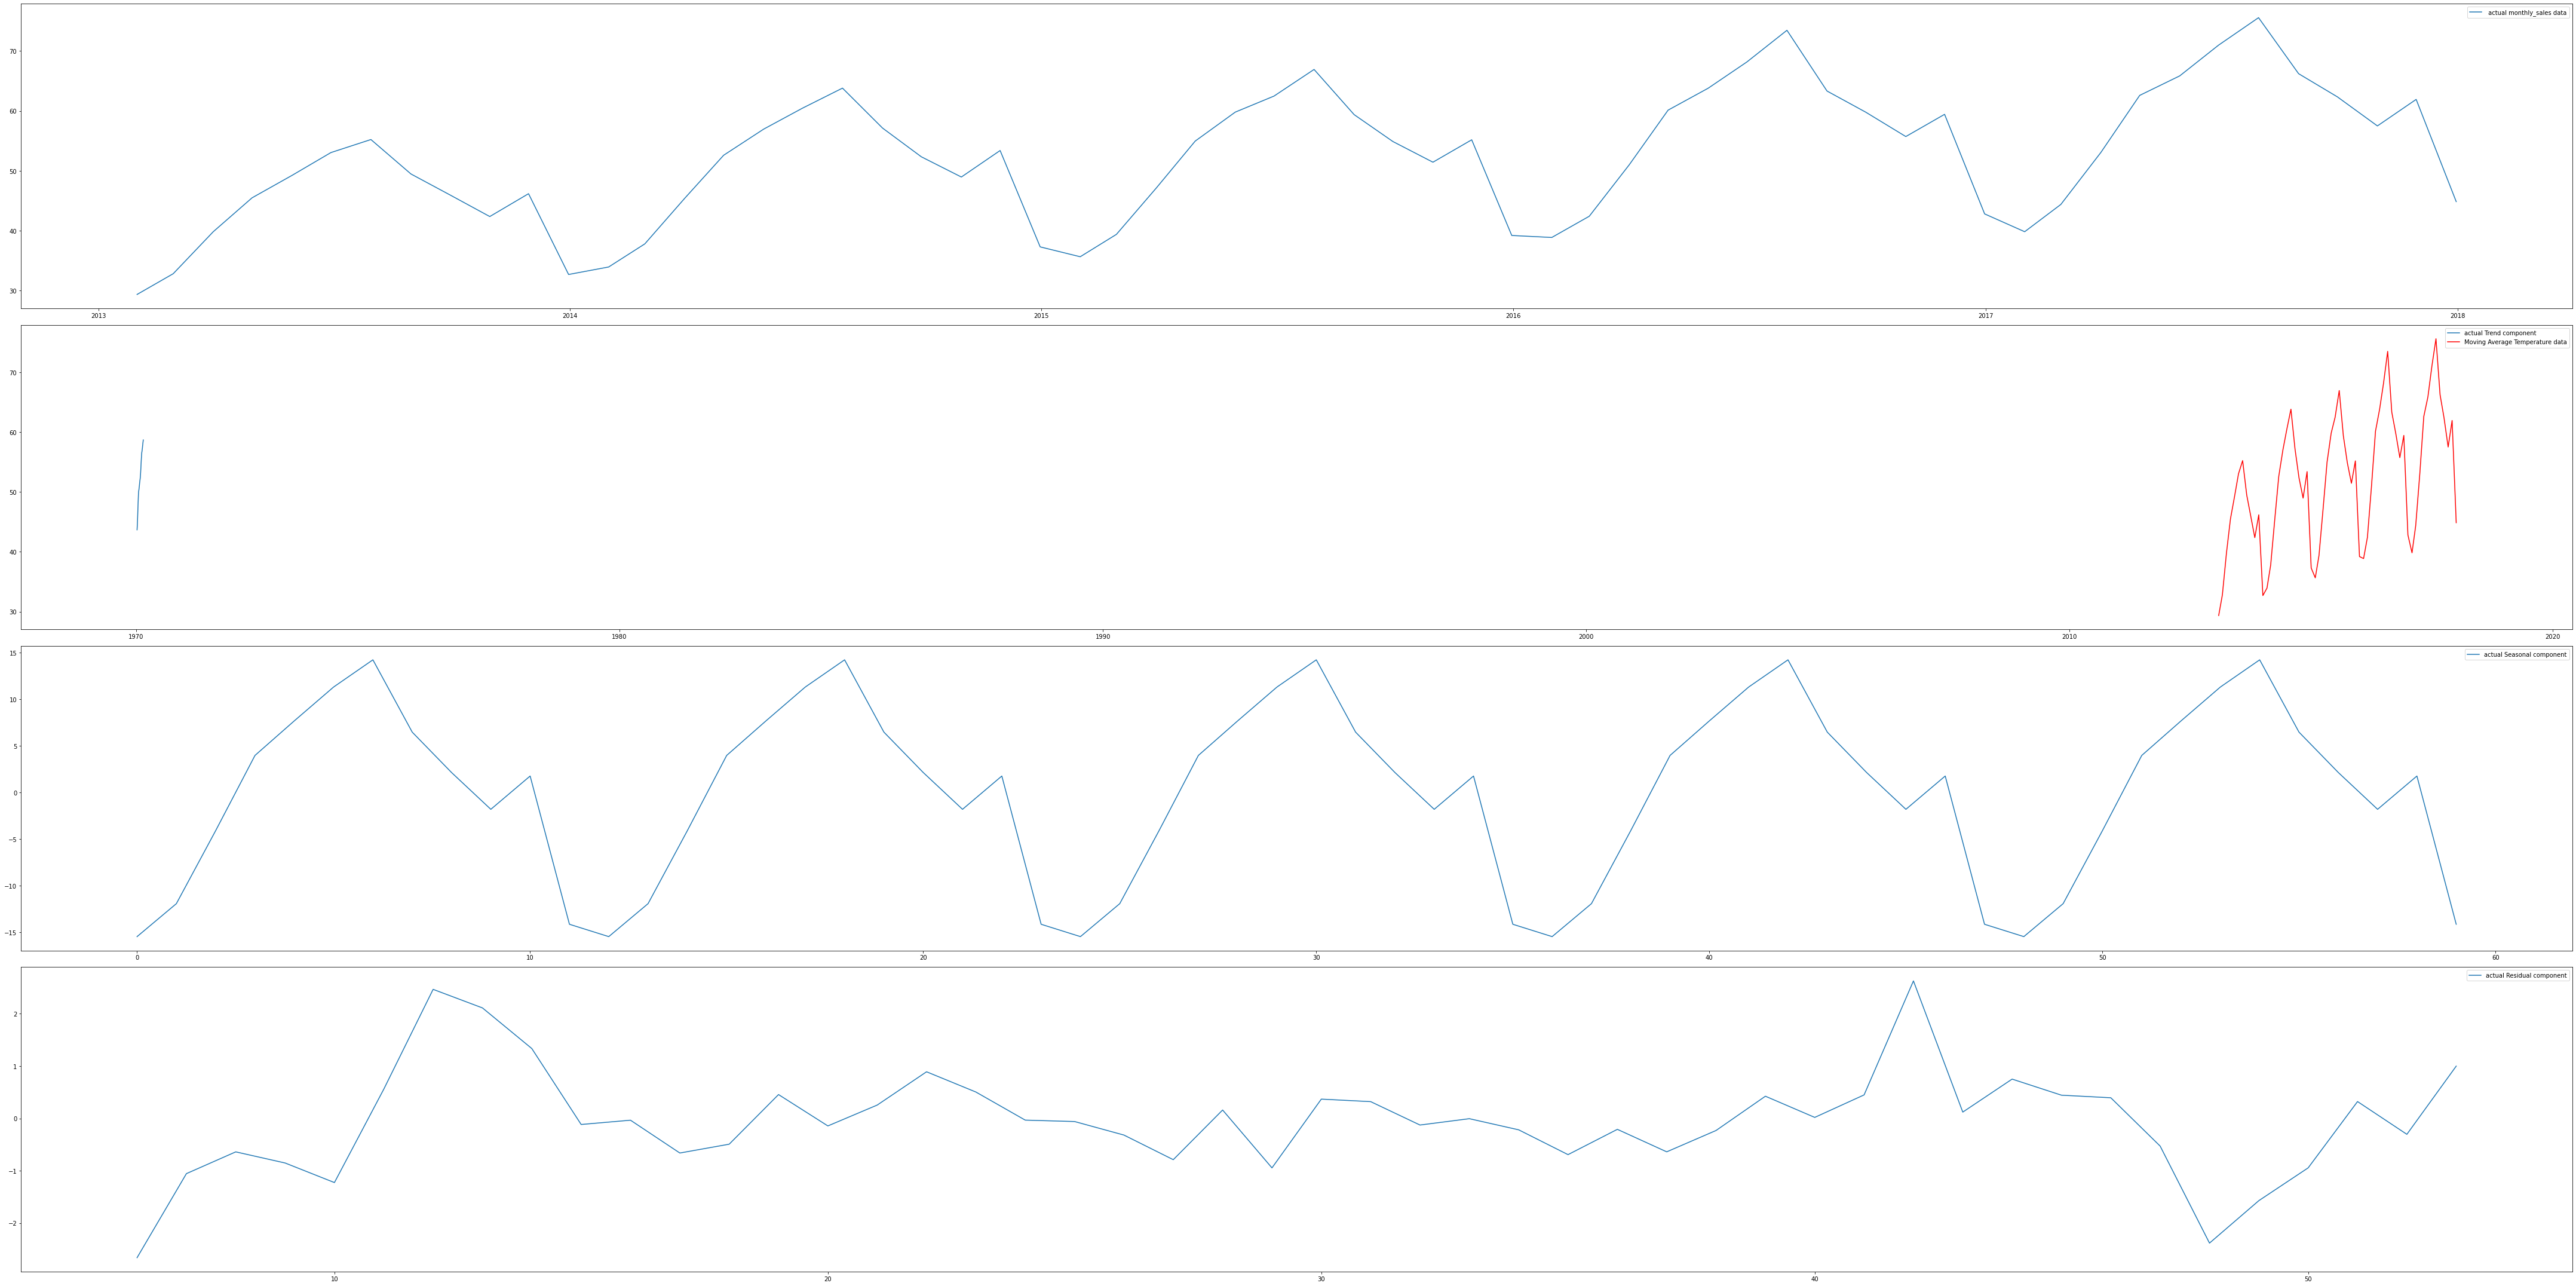

In [19]:
decomposition=seasonal_decompose(np.asarray(monthly_sales),model='additive', period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid
plt.figure(figsize=(60,30))

plt.subplot(411)
plt.plot(monthly_sales,label=' actual monthly_sales data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='actual Trend component')
plt.plot(monthly_sales, color='red', label = 'Moving Average monthly_saleserature data')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='actual Seasonal component')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='actual Residual component')
plt.legend(loc='best')

plt.tight_layout()

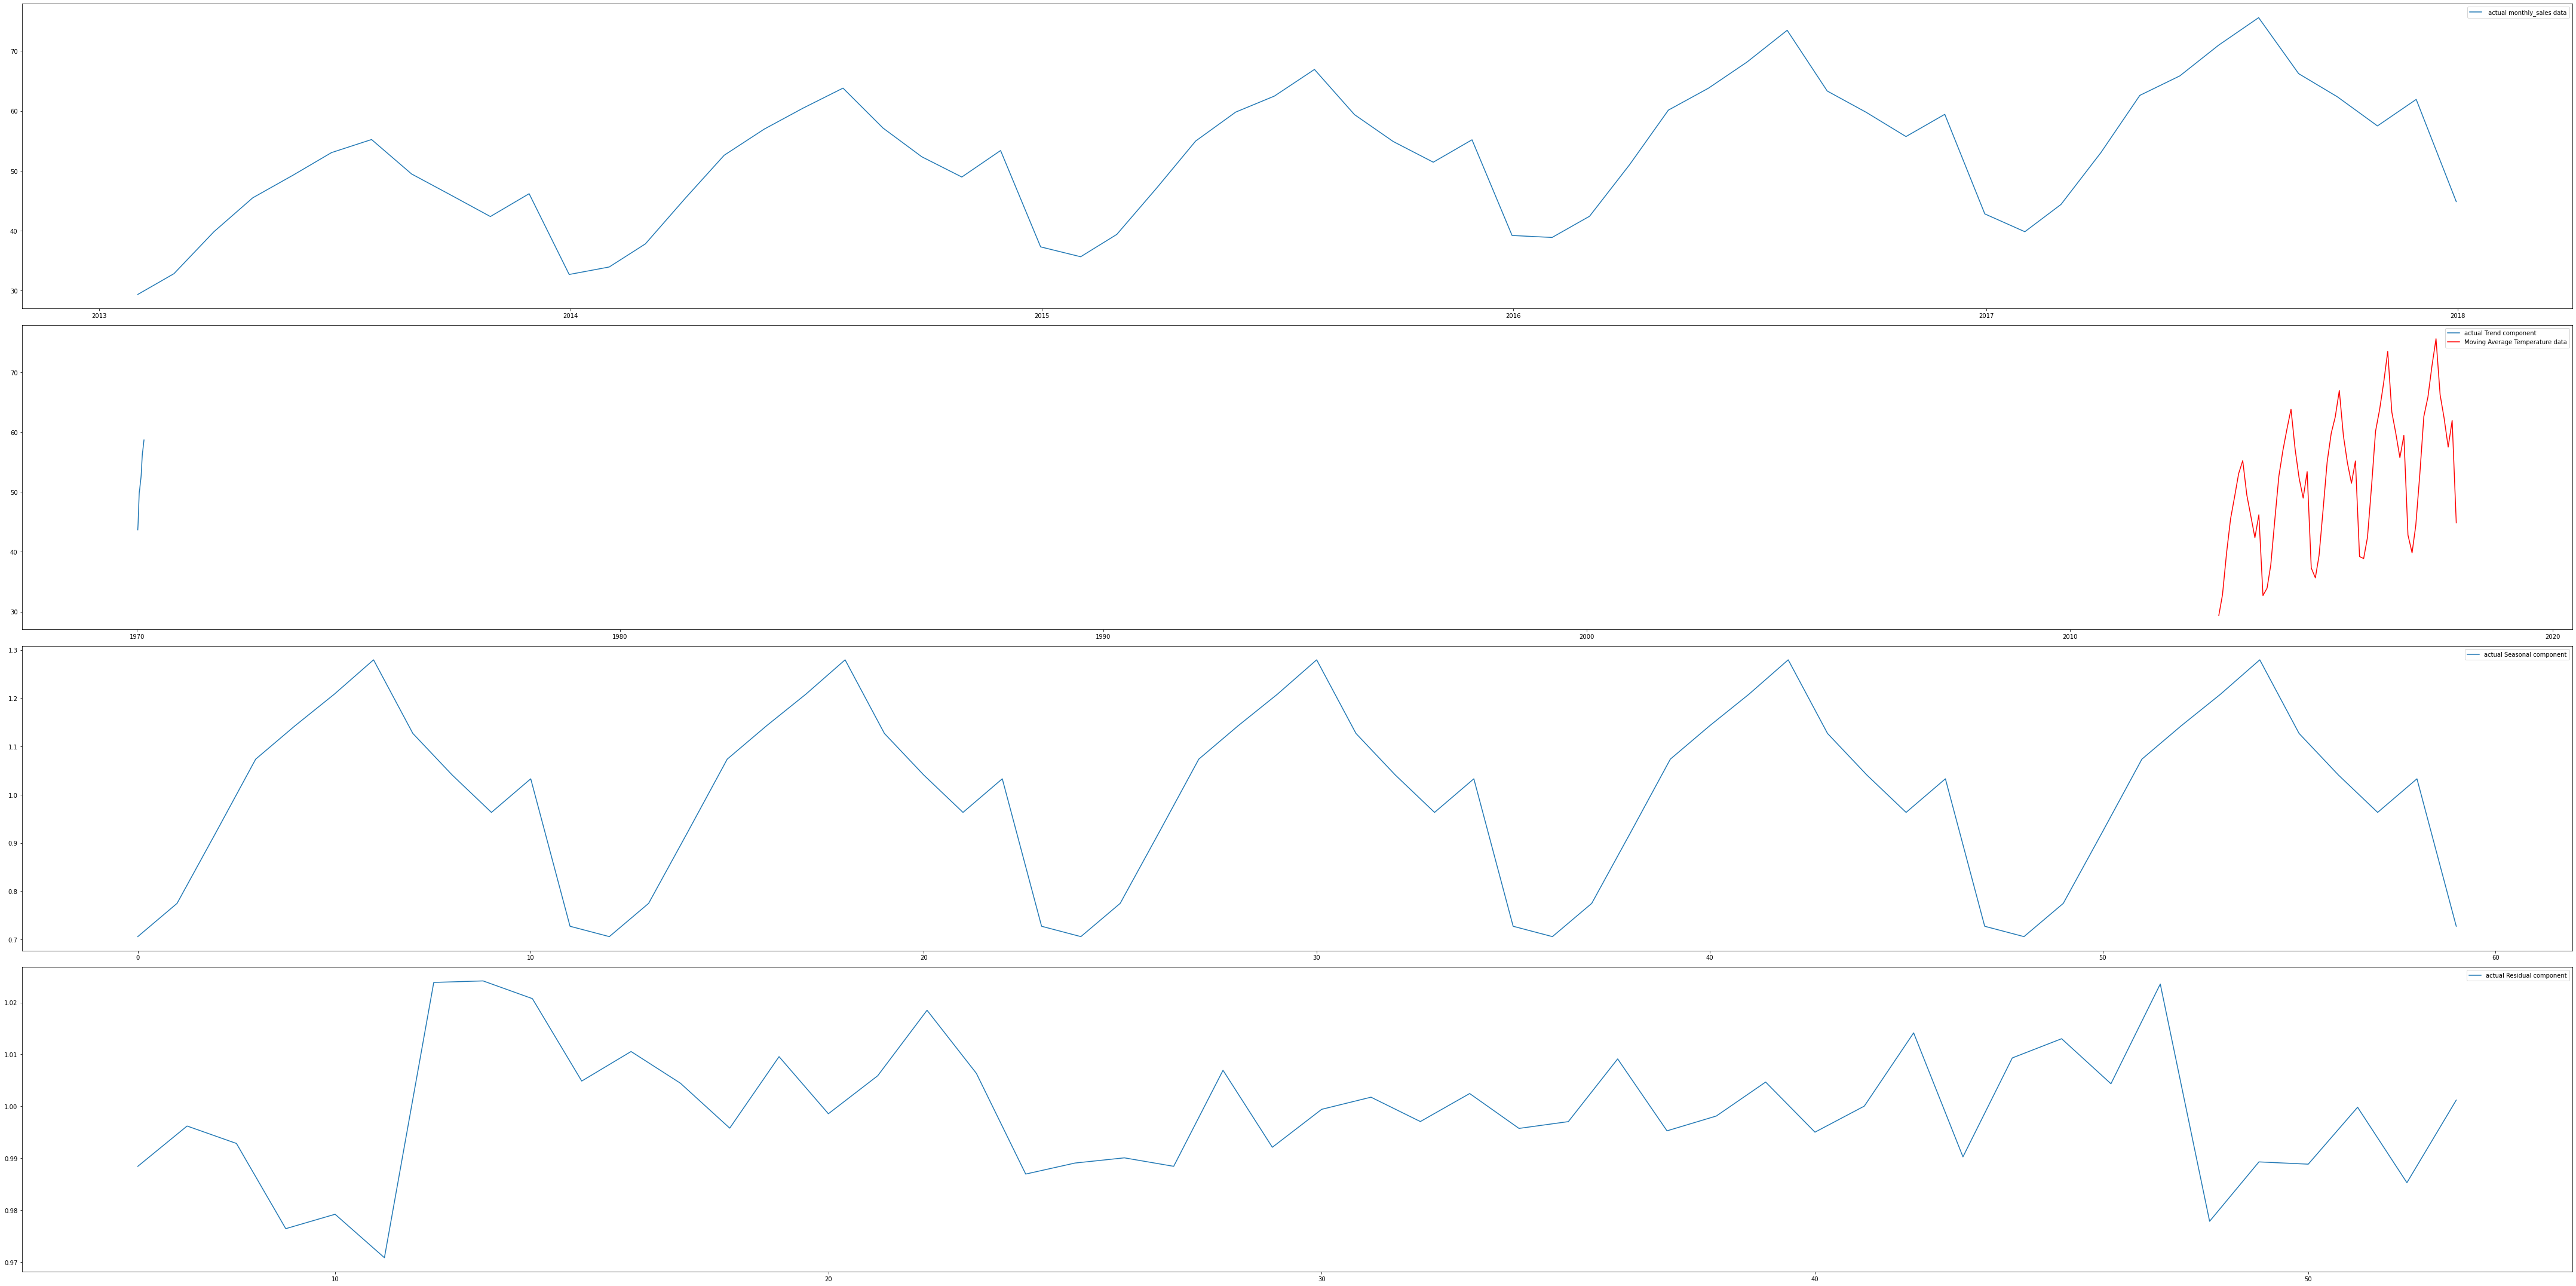

In [20]:
decomposition=seasonal_decompose(np.asarray(monthly_sales),model='multiplicative', period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid
plt.figure(figsize=(60,30))

plt.subplot(411)
plt.plot(monthly_sales,label=' actual monthly_sales data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(d_trend,label='actual Trend component')
plt.plot(monthly_sales, color='red', label = 'Moving Average monthly_saleserature data')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(d_seasonal,label='actual Seasonal component')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(d_residual,label='actual Residual component')
plt.legend(loc='best')

plt.tight_layout()

In [23]:
def checkStationarity(data):
    pvalue = adfuller(monthly_sales)[1]
    print(pvalue)

    if pvalue < 0.05:
        msg = "pvalue={}. Data is Stationary. Proceed to model building".format(pvalue)
    else:
        msg = "pvalue={}. Data is not Stationary. Make the data stationary before model building".format(pvalue)

    return msg

In [24]:
print(checkStationarity(monthly_sales))

3.692387626163412e-06
pvalue=3.692387626163412e-06. Data is Stationary. Proceed to model building


In [25]:
def simplesmoothing(data,alpha):
    model = SimpleExpSmoothing(data).fit(smoothing_level=alpha,optimized=False)
    pdct = model.fittedvalues
    df = pd.DataFrame({'actual':data, 'forecast':pdct})
    return(model,df)

In [28]:
d_simple_exp = {}
alphas = [0, 0.2, 0.6, 0.8]

for a in alphas:
    model, df2 = simplesmoothing(monthly_sales,a)
    d_simple_exp[a] = df2.forecast

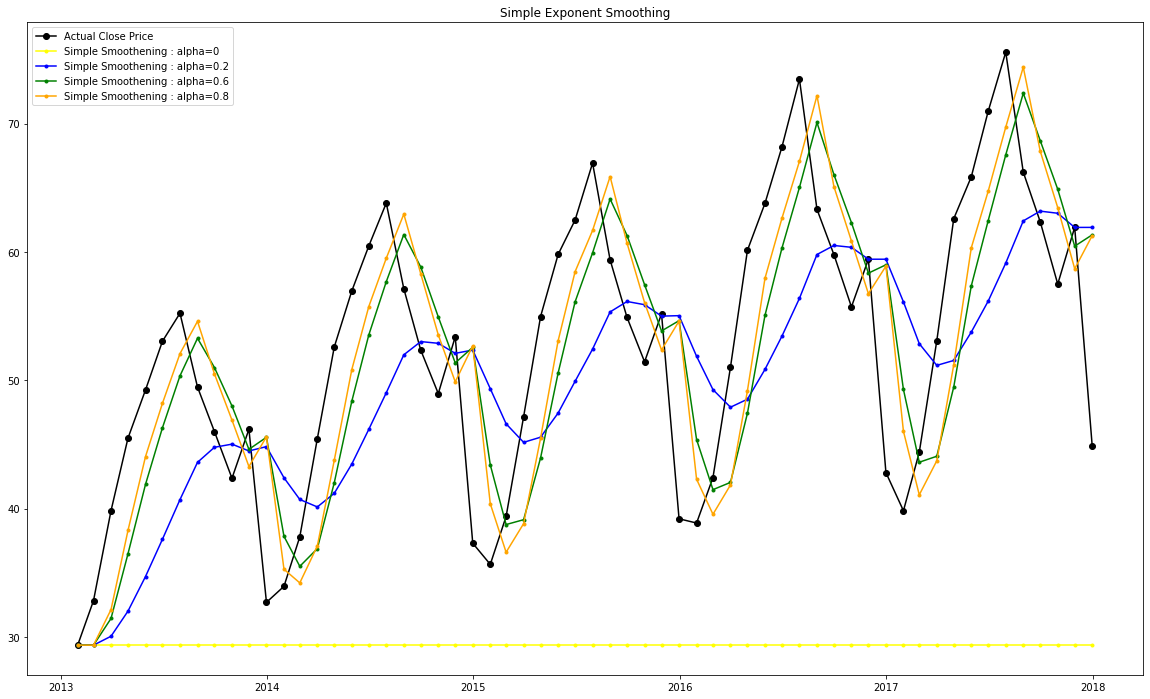

In [29]:
colors = ['yellow','blue','green','orange']
fig,ax = plt.subplots(1,1,figsize=(20,12))
plt.plot(monthly_sales, marker='o', color='black',label='Actual Close Price')

for i in range(len(alphas)):
    plt.plot(d_simple_exp[alphas[i]],marker='.',color=colors[i],label='Simple Smoothening : alpha=' + str(alphas[i]))

plt.title('Simple Exponent Smoothing')
plt.legend()
plt.show()

In [30]:
modela = ExponentialSmoothing(monthly_sales,trend='additive').fit(smoothing_level=0.2, smoothing_slope=0.5)

f_dexp = modela.fittedvalues
print(f_dexp)

date
2013-01-31    42.418425
2013-02-28    40.777403
2013-03-31    39.361765
2013-04-30    39.679308
2013-05-31    41.644672
2013-06-30    44.727935
2013-07-31    48.785408
2013-08-31    53.111118
2013-09-30    55.056955
2013-10-31    55.012378
2013-11-30    52.984855
2013-12-31    51.445120
2014-01-31    45.638877
2014-02-28    40.073524
2014-03-31    36.165182
2014-04-30    35.494808
2014-05-31    38.099553
2014-06-30    42.942482
2014-07-31    49.267456
2014-08-31    56.451592
2014-09-30    60.932890
2014-10-31    62.700074
2014-11-30    62.063552
2014-12-31    61.571601
2015-01-31    55.531798
2015-02-28    48.381893
2015-03-31    42.508515
2015-04-30    39.830443
2015-05-31    40.762655
2015-06-30    44.379304
2015-07-31    49.618348
2015-08-31    56.429703
2015-09-30    60.664868
2015-10-31    62.577012
2015-11-30    62.301969
2015-12-31    62.117502
2016-01-31    56.482370
2016-02-29    50.146498
2016-03-31    45.012992
2016-04-30    43.230098
2016-05-31    45.314856
2016-06-30 

Text(0.5, 1.0, 'Double Exponent Smoothing')

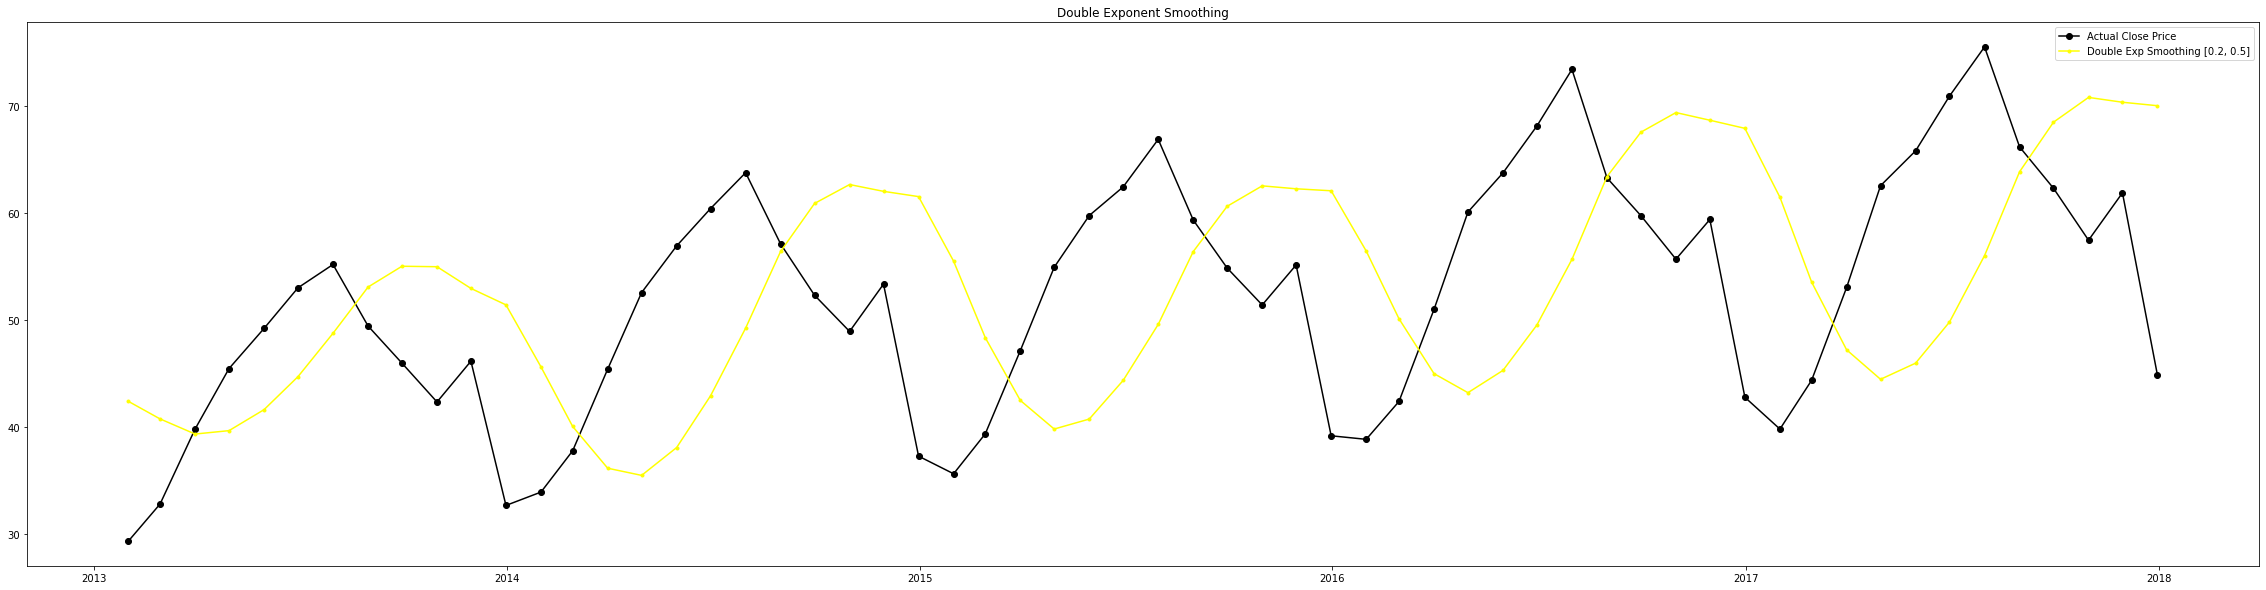

In [31]:
plt.figure(figsize=(40,10))
plt.plot(monthly_sales,marker='o',color='black',label='Actual Close Price')
plt.plot(f_dexp, marker='.',color='yellow',label='Double Exp Smoothing [0.2, 0.5]')
plt.legend()
plt.title('Double Exponent Smoothing')

In [32]:
modelt = ExponentialSmoothing(monthly_sales,trend='add',seasonal='add',seasonal_periods=12).fit()

Text(0.5, 1.0, 'Triple Exponent Smoothing')

<Figure size 2880x720 with 0 Axes>

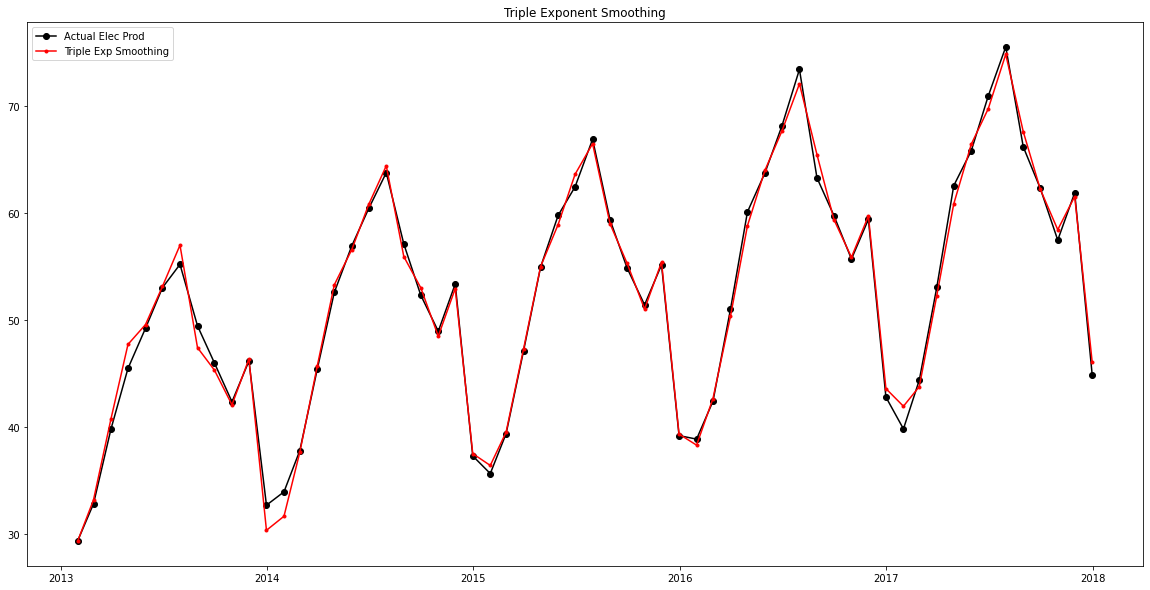

In [33]:
plt.figure(figsize=(40,10))
ax = plt.subplots(figsize = (20,10))
plt.plot(monthly_sales, marker='o',color='black',label='Actual Elec Prod')
plt.plot(modelt.fittedvalues,marker='.',color='red',label='Triple Exp Smoothing')
plt.legend()

plt.title('Triple Exponent Smoothing')